In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import io
from google.colab import files
uploaded = files.upload()
df = pd.read_csv(io.BytesIO(uploaded['SAD_filtered_data.csv']))

Saving SAD_filtered_data.csv to SAD_filtered_data (2).csv


In [ ]:
df.head()

,Customer Identity,First Policy´s Year,Customer Age,Educational Degree,Gross Monthly Salary,Geographic Living Area,Children,Customer Monetary Value,Claims Rate,Premiums in LOB: Motor,Premiums in LOB: Household,Premiums in LOB: Health,Premiums in LOB: Life,Premiums in LOB: Work Compensations
0,1,1985.0,34.0,2,4354.0,1.0,1.0,380.97,0.39,375.85,79.45,146.36,47.01,16.89
1,2,1981.0,21.0,2,1353.0,4.0,1.0,-131.13,1.12,77.46,416.20,116.69,194.48,106.13
2,3,1991.0,46.0,1,4554.0,3.0,0.0,504.67,0.28,206.15,224.50,124.58,86.35,99.02
3,4,1990.0,35.0,3,2197.0,4.0,1.0,-16.99,0.99,182.48,43.35,311.17,35.34,28.34
4,5,1986.0,43.0,3,3526.0,4.0,1.0,35.23,0.90,338.62,47.80,182.59,18.78,41.45


Index:

*   Customer Age - Data Visualization
*   Gross Monthly Salary and Claims Rate - Data Visualization
*   Categorical Variables (Children, Educational Degree, Geographic Living Area)
*   Yearly evolution of variables
*   Correlations







## **Customer Age - Data Visualization**

**Data Visualized:**
1.   Scatter plots of Customer Age in relation to the Premiums Variables, Claims Rate and Gross Monthly Salary
2.   Boxplot and Histplot of Customer Age
3.   Barplot of Age Groups

**Observations:** 

Motor seems to be the only Premium that differentiates from the remaining Premiums in that younger customers have very low value premiums. The price of premiums grows along with customer age until around 45-55 years old. After this age point the value decreases.
For the remaining the remaining premiums the opposite happens: the value starts high for younger customers and decreases until the same group of 45-55 years old and then it starts increasing with the customer age.

For both the Claims Rate and the Customer Monetary Value, there are no meaningful observations, other than that they are very similar. Further ahead it is shown that they are highly correlated (In the "Correlations" section).

The Gross Monthly Salary increases with Customer Age (with some exceptions) which is expected.

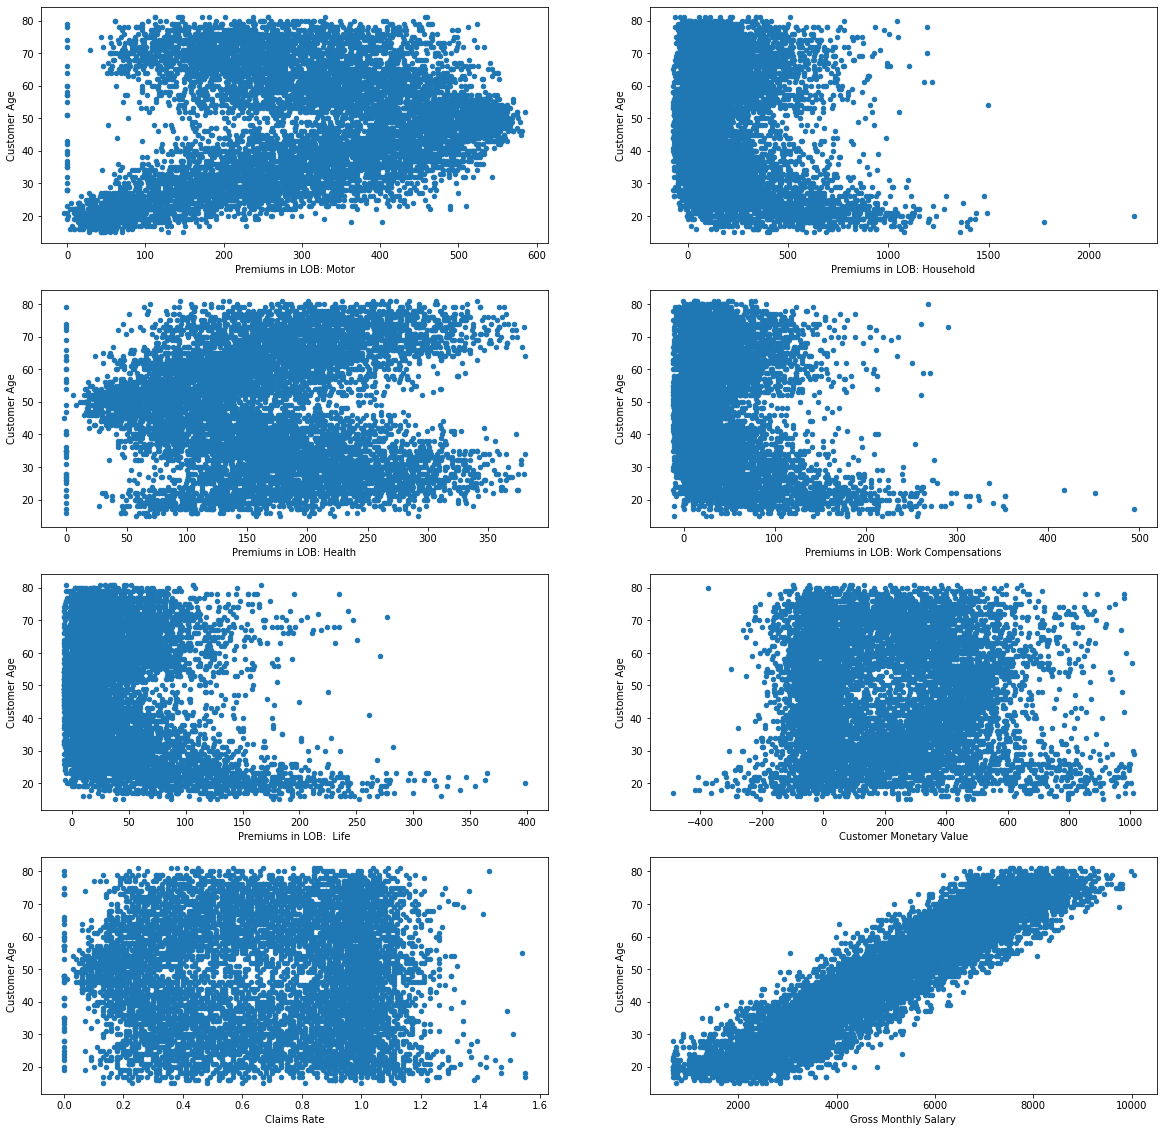

In [ ]:
df_visual = df.copy()
fig, axes = plt.subplots(4,2, figsize=(20, 20))

df_visual.plot.scatter(x='Premiums in LOB: Motor', y='Customer Age', ax = axes[0,0])
df_visual.plot.scatter(x='Premiums in LOB: Household', y='Customer Age', ax = axes[0,1])
df_visual.plot.scatter(x='Premiums in LOB: Health', y='Customer Age', ax = axes[1,0])
df_visual.plot.scatter(x='Premiums in LOB: Work Compensations', y='Customer Age', ax = axes[1,1])
df_visual.plot.scatter(x='Premiums in LOB:  Life', y='Customer Age', ax = axes[2,0])
df_visual.plot.scatter(x='Customer Monetary Value', y='Customer Age', ax = axes[2,1])
df_visual.plot.scatter(x='Claims Rate', y='Customer Age', ax = axes[3,0])
df_visual.plot.scatter(x='Gross Monthly Salary', y='Customer Age', ax = axes[3,1])
plt.show()

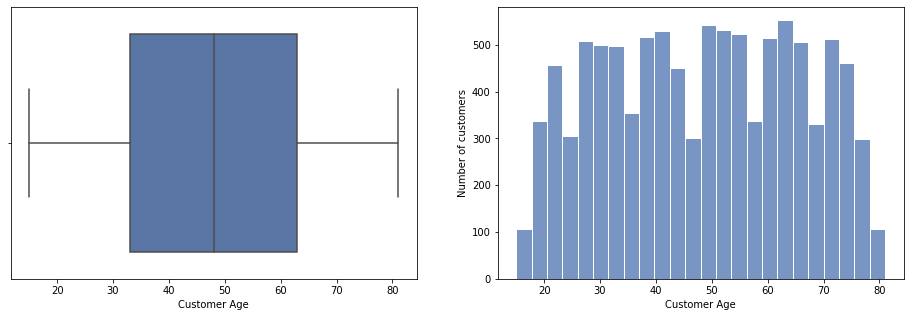

In [ ]:
fig, ax =plt.subplots(1,2, figsize =(16,5))
sns.set_theme(style="whitegrid")
sns.boxplot(x=df['Customer Age'], ax = ax[0])
ax = sns.histplot(data=df, x='Customer Age',ax = ax[1])
ax.set(ylabel='Number of customers')
plt.show()

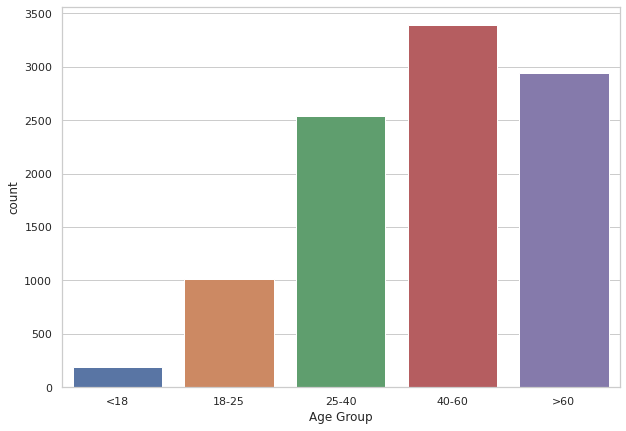

In [ ]:
df_AgeGroup = df.copy()
age_group = pd.cut(df_AgeGroup['Customer Age'],bins=[0,18,25,40,60,100],labels=['<18','18-25','25-40','40-60','>60'])
df_AgeGroup.insert(2, 'Age Group',age_group)

fig = plt.figure(figsize = (10, 7))
sns.set_theme(style="whitegrid")
ax=sns.countplot(x="Age Group", data=df_AgeGroup)
#ax.bar_label(ax.containers[0]) ## Para colocar os valores por cima das barras
plt.show()

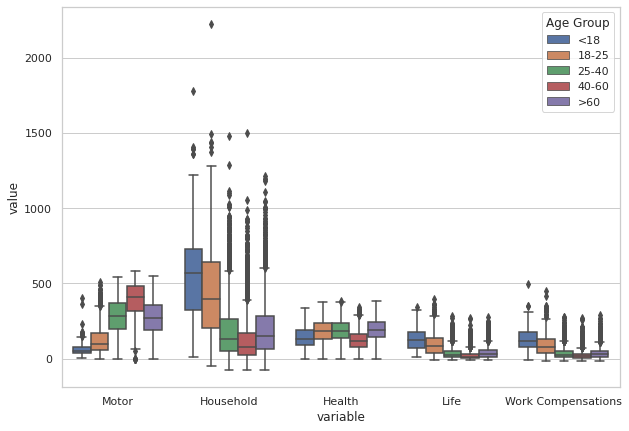

In [ ]:
df_AgeGroup = df_AgeGroup.rename(columns={'Premiums in LOB: Motor': 'Motor', 'Premiums in LOB: Household' : "Household",'Premiums in LOB: Health':'Health', 'Premiums in LOB:  Life': 'Life', 'Premiums in LOB: Work Compensations':  'Work Compensations' })
df_AgeGroup = pd.melt(df_AgeGroup,  value_vars=['Motor','Household', 'Health','Life', 'Work Compensations'],id_vars=['Age Group'])

fig = plt.figure(figsize = (10, 7))
sns.set_theme(style="whitegrid")
sns.boxplot(x="variable", y="value", hue="Age Group", data=df_AgeGroup)
plt.show()

## **Gross Monthly Salary and Claims Rate - Data Visualization**

**Data Visualized:**
1.   Scatter Plots of Gross Monthly Salary (GMS) in relation to the Premium variables and the Customer Monetary Value (CMV).
2.   Scatter Plots of Claims Rate in relation to the Premium variables and the Customer Monetary Value (CMV).

**Observations:**

Given that Customer Age and GMS are directly proportional, has is shown in the section above, their behaviour regarding the Premiums is very similar.

The Claims Scatter Plots seem to show that for the most part the Claims Rate increases and then decreases with the exception of the Motor Premium and the Household Premium.

No real conclusion or observation can be taken from the Claims Rate X GMS, there seems to be no relation between the two variables at first sight.

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

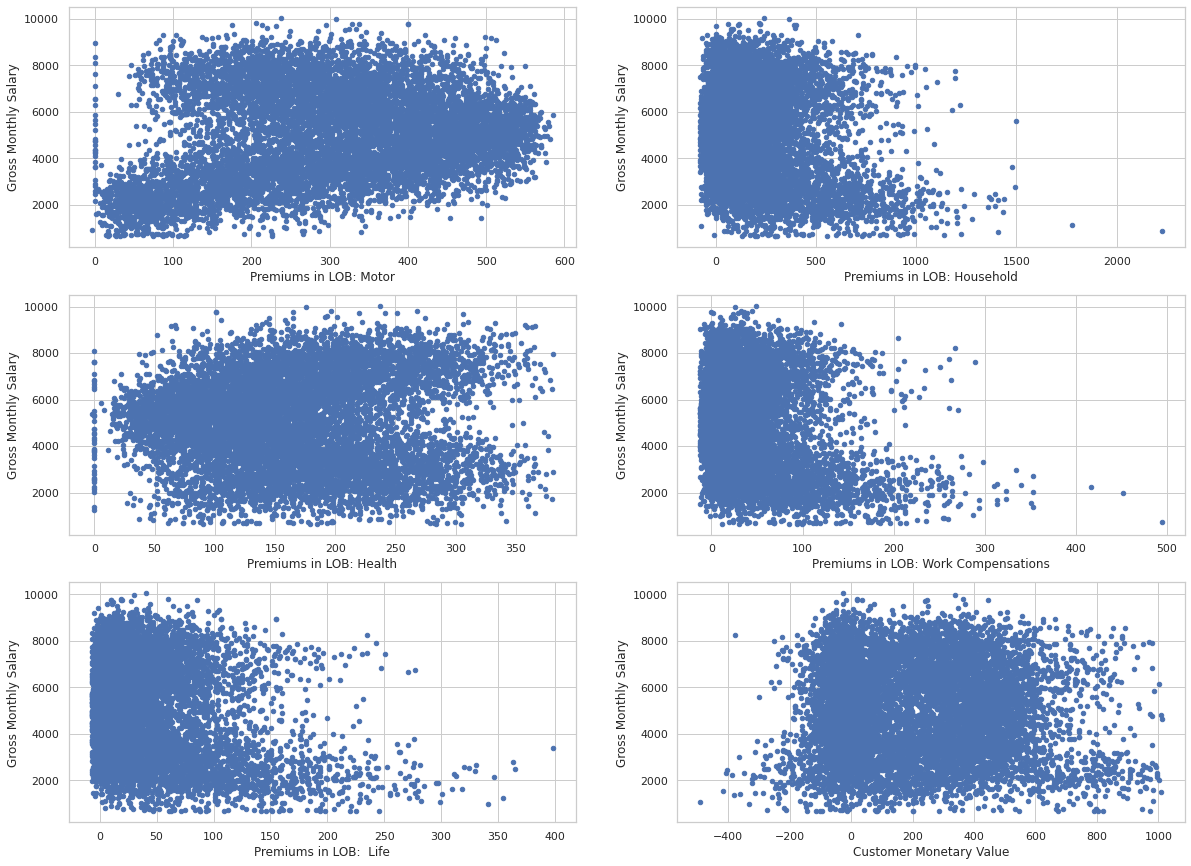

In [ ]:
fig, axes = plt.subplots(3,2, figsize=(20,15))

df_visual.plot.scatter(x='Premiums in LOB: Motor', y='Gross Monthly Salary', ax = axes[0,0])
df_visual.plot.scatter(x='Premiums in LOB: Household', y='Gross Monthly Salary', ax = axes[0,1])
df_visual.plot.scatter(x='Premiums in LOB: Health', y='Gross Monthly Salary', ax = axes[1,0])
df_visual.plot.scatter(x='Premiums in LOB: Work Compensations', y='Gross Monthly Salary', ax = axes[1,1])
df_visual.plot.scatter(x='Premiums in LOB:  Life', y='Gross Monthly Salary', ax = axes[2,0])
df_visual.plot.scatter(x='Customer Monetary Value', y='Gross Monthly Salary', ax = axes[2,1])
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

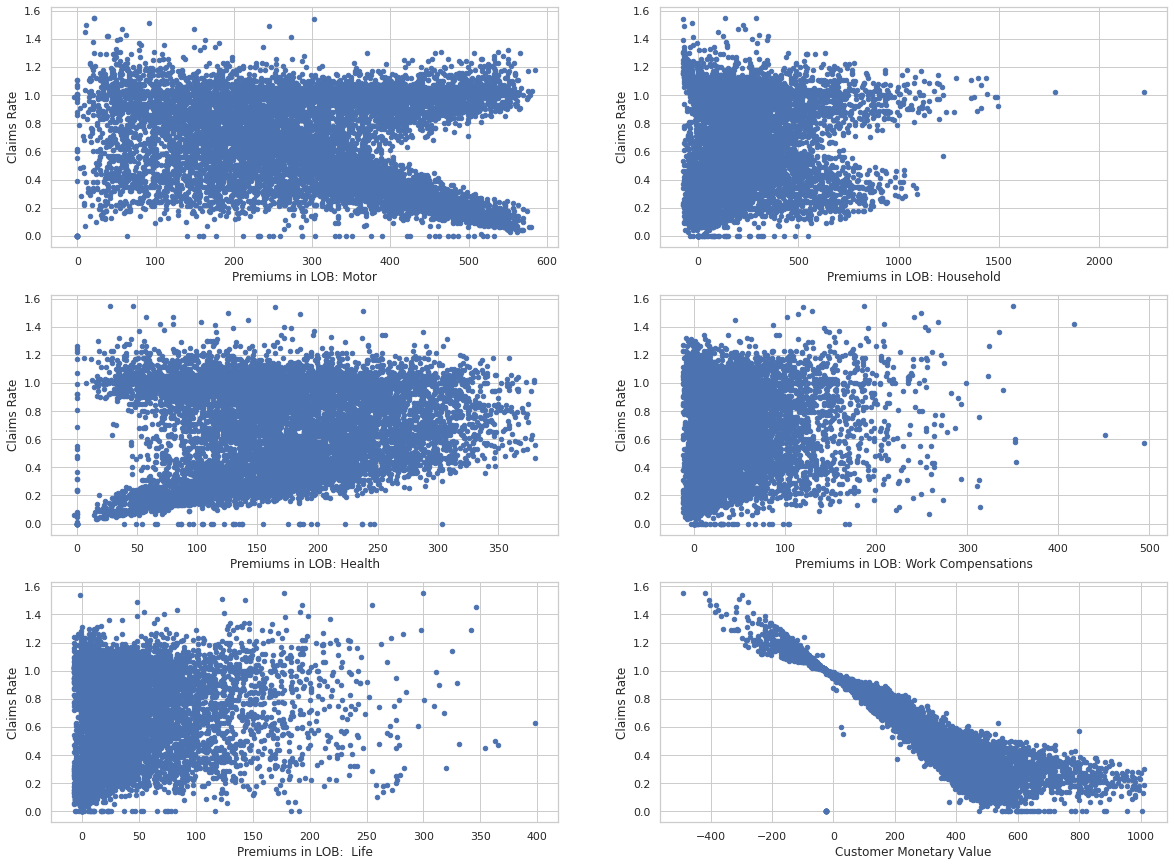

In [ ]:
fig, axes = plt.subplots(3,2, figsize=(20,15))

df_visual.plot.scatter(x='Premiums in LOB: Motor', y='Claims Rate', ax = axes[0,0])
df_visual.plot.scatter(x='Premiums in LOB: Household', y='Claims Rate', ax = axes[0,1])
df_visual.plot.scatter(x='Premiums in LOB: Health', y='Claims Rate', ax = axes[1,0])
df_visual.plot.scatter(x='Premiums in LOB: Work Compensations', y='Claims Rate', ax = axes[1,1])
df_visual.plot.scatter(x='Premiums in LOB:  Life', y='Claims Rate', ax = axes[2,0])
df_visual.plot.scatter(x='Customer Monetary Value', y='Claims Rate', ax = axes[2,1])
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


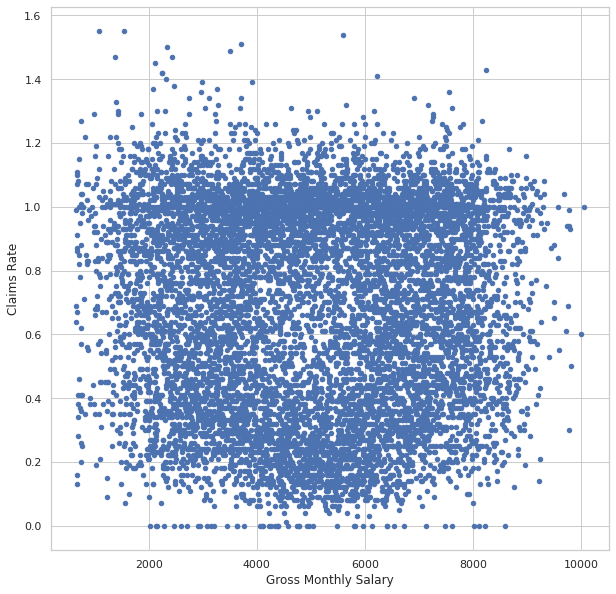

In [ ]:
df_visual.plot.scatter(x='Gross Monthly Salary', y='Claims Rate', figsize = (10, 10))
plt.show()

### **Types of Premiums**

A premium is here considered as the purchase price of an insurance policy or the regular payments required by an insurer to provide coverage for a defined period of time

Below there is a simple study of the total value of each premium in a Barplot and a Table showing the Mean, the Median and the Sum for each Premium and for the "Total Premiums" which is the sum of all premiums.

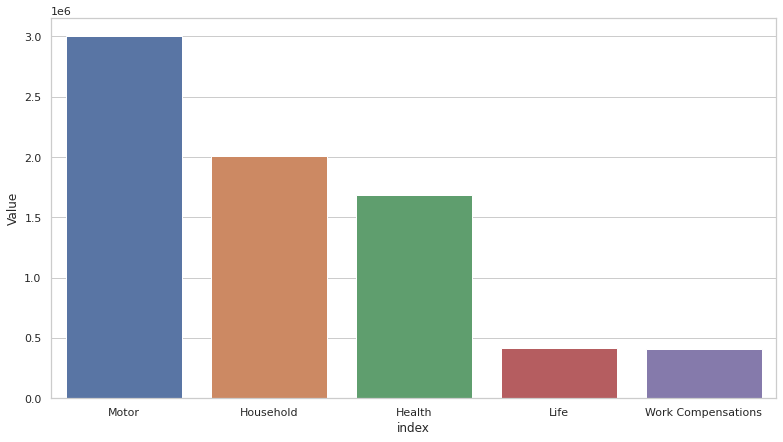

In [ ]:
df_premiums = df[['Premiums in LOB: Motor','Premiums in LOB: Household','Premiums in LOB: Health','Premiums in LOB:  Life','Premiums in LOB: Work Compensations']]
df_premiums = df_premiums.rename(columns={'Premiums in LOB: Motor': 'Motor', 'Premiums in LOB: Household' : "Household",'Premiums in LOB: Health':'Health', 'Premiums in LOB:  Life': 'Life', 'Premiums in LOB: Work Compensations':  'Work Compensations' })
df_premiums = df_premiums.sum()
df_premiums = pd.DataFrame(df_premiums)
df_premiums.reset_index(inplace=True)

fig = plt.figure(figsize = (13, 7))
sns.set_theme(style="whitegrid")
ax = sns.barplot(x="index", y=0, data=df_premiums)
#ax.bar_label(ax.containers[0]) ## Para colocar os valores por cima das barras
ax.set(ylabel='Value')
plt.show()

In [ ]:
df_premiums = df_visual[["Premiums in LOB: Motor",
                            "Premiums in LOB: Household", 
                            "Premiums in LOB: Health", 
                            "Premiums in LOB:  Life", 
                            "Premiums in LOB: Work Compensations"]].copy()
df_premiums['Total Premiums'] = df_premiums.sum(axis=1)

pd.options.display.float_format = '$ {:,.2f}'.format
ins_sum = pd.DataFrame(df_premiums.sum(), columns=['Sum'])
ins_mean = pd.DataFrame(df_premiums.mean(), columns=['Mean'])
ins_median = pd.DataFrame(df_premiums.median(), columns=['Median'])
pd.concat([ins_sum, ins_mean, ins_median], axis=1, sort=False)

,Sum,Mean,Median
Premiums in LOB: Motor,"$ 3,004,934.57",$ 298.29,$ 300.39
Premiums in LOB: Household,"$ 2,010,770.65",$ 199.60,$ 132.25
Premiums in LOB: Health,"$ 1,684,144.26",$ 167.18,$ 162.81
Premiums in LOB: Life,"$ 415,451.72",$ 41.24,$ 24.67
Premiums in LOB: Work Compensations,"$ 405,449.86",$ 40.25,$ 25.45
Total Premiums,"$ 7,520,751.06",$ 746.55,$ 696.30


# **Categorical Columns**

**Data Visualized:**
1.   Barplot and Boxplot for Children
2.   Barplot and Boxplot for Educational Degree
3.   Barplot and Boxplot for Geographic Living Area

**Observations:**
In this section there is an analysis of the categorical variables of the dataset made. A categorical variable (also called qualitative variable) is a variable that can take on one of a limited, and usually fixed, number of possible values, assigning each individual or other unit of observation to a particular group or nominal category on the basis of some qualitative property. For this dataset there were three variables with this characteristic:
*   Children - Can take the value of 1 and 0
  *   There is significantly more customers with kids than without
  *   With the exception of Motor, most premiums have a higher value for customers without kids, though the difference is not very significant.

*   Educational Degree - This variable was modified to only show values from 1 to 4, each refering to different degree
  *    It can be shown by the Barplot that the great majority of clients have either a High School Degree ("2") or a BSc/MSc degree ("3").
  *    For the Household, Life and Work Compensations Premiums there is a decrease of value with the increase of educational degree. For Motor, the contrary happens. Finally the Health premium seems higher for High School Degree but the difference is not very significant for the rest of the Premiums.

*   Geographic Living Area - Can take the value of 1, 2, 3 or 4.
  *    There a vast majority of customers living in the Geographic Living Are of 1 and 4
  *    There is no significant difference between the values of premiums for each geographic living area.


Children

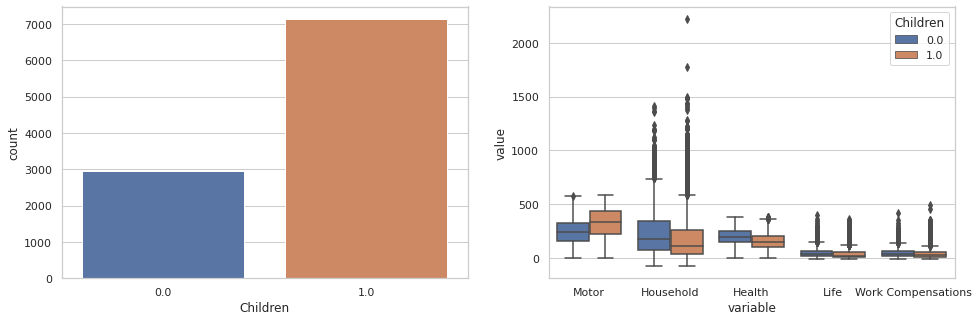

In [ ]:
fig, ax =plt.subplots(1,2, figsize =(16,5))

sns.set_theme(style="whitegrid")
chart = sns.countplot(data=df, x='Children', ax = ax[0])
#chart.bar_label(chart.containers[0])
df_prem_child = df_visual.rename(columns={'Premiums in LOB: Motor': 'Motor', 'Premiums in LOB: Household' : "Household",'Premiums in LOB: Health':'Health', 'Premiums in LOB:  Life': 'Life', 'Premiums in LOB: Work Compensations':  'Work Compensations' })
df_prem_child = pd.melt(df_prem_child,  value_vars=['Motor','Household', 'Health','Life', 'Work Compensations'],id_vars=['Children'])
sns.set_theme(style="whitegrid")
sns.boxplot(x="variable", y="value", hue="Children", data=df_prem_child, ax= ax[1])

plt.show()

Educational Degree

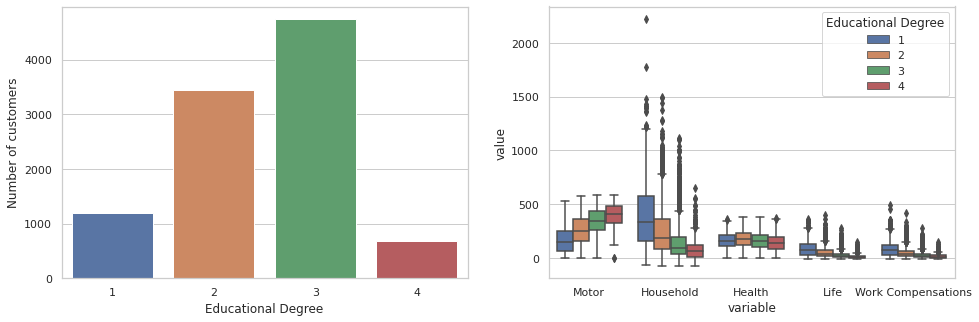

In [ ]:
df_prem_degree = df_visual.rename(columns={'Premiums in LOB: Motor': 'Motor', 'Premiums in LOB: Household' : "Household",'Premiums in LOB: Health':'Health', 'Premiums in LOB:  Life': 'Life', 'Premiums in LOB: Work Compensations':  'Work Compensations' })
df_prem_degree = pd.melt(df_prem_degree,  value_vars=['Motor','Household', 'Health','Life', 'Work Compensations'],id_vars=['Educational Degree'])

fig, ax =plt.subplots(1,2, figsize =(16,5))
sns.set_theme(style="whitegrid")
chart = sns.countplot(data=df, x='Educational Degree', ax = ax[0])
chart.set(ylabel='Number of customers')
#chart.bar_label(chart.containers[0])
sns.boxplot(x="variable", y="value", hue="Educational Degree", data=df_prem_degree, ax = ax[1])
plt.show()

Geographic Living Area

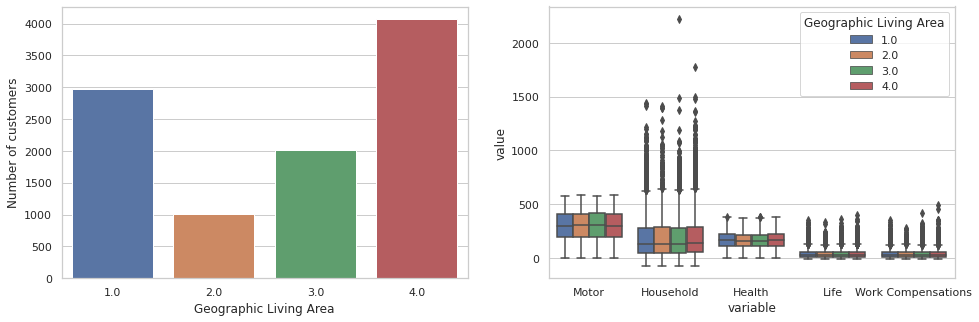

In [ ]:
df_prem_area = df_visual.rename(columns={'Premiums in LOB: Motor': 'Motor', 'Premiums in LOB: Household' : "Household",'Premiums in LOB: Health':'Health', 'Premiums in LOB:  Life': 'Life', 'Premiums in LOB: Work Compensations':  'Work Compensations' })
df_prem_area = pd.melt(df_prem_area,  value_vars=['Motor','Household', 'Health','Life', 'Work Compensations'],id_vars=['Geographic Living Area'])

fig, ax =plt.subplots(1,2, figsize =(16,5))
sns.set_theme(style="whitegrid")
chart = sns.countplot(data=df, x='Geographic Living Area', ax = ax[0])
chart.set(ylabel='Number of customers')
#chart.bar_label(chart.containers[0]) 
sns.boxplot(x="variable", y="value", hue="Geographic Living Area", data=df_prem_area, ax = ax[1])

plt.show()

# **Yearly Evolution of Premiums**

In [ ]:
df_byyear = df_visual.groupby('First Policy´s Year').mean()
df_byyear

,Customer Identity,Customer Age,Educational Degree,Gross Monthly Salary,Geographic Living Area,Children,Customer Monetary Value,Claims Rate,Premiums in LOB: Motor,Premiums in LOB: Household,Premiums in LOB: Health,Premiums in LOB: Life,Premiums in LOB: Work Compensations
First Policy´s Year,,,,,,,,,,,,,
"$ 1,974.00","$ 5,422.32",$ 51.44,$ 2.54,"$ 5,235.61",$ 2.61,$ 0.63,$ 187.03,$ 0.68,$ 307.15,$ 184.75,$ 153.79,$ 43.64,$ 38.14
"$ 1,975.00","$ 5,108.26",$ 47.92,$ 2.49,"$ 4,993.31",$ 2.75,$ 0.72,$ 183.42,$ 0.72,$ 293.43,$ 208.15,$ 165.81,$ 43.74,$ 43.34
"$ 1,976.00","$ 5,271.58",$ 47.69,$ 2.44,"$ 4,986.69",$ 2.67,$ 0.71,$ 202.68,$ 0.70,$ 295.16,$ 197.15,$ 169.19,$ 41.32,$ 39.15
"$ 1,977.00","$ 5,225.96",$ 47.13,$ 2.45,"$ 4,913.64",$ 2.80,$ 0.70,$ 203.39,$ 0.70,$ 297.92,$ 199.82,$ 169.01,$ 41.74,$ 39.89
"$ 1,978.00","$ 5,134.48",$ 47.25,$ 2.52,"$ 4,886.65",$ 2.57,$ 0.72,$ 205.79,$ 0.69,$ 301.16,$ 203.98,$ 165.84,$ 41.96,$ 39.61
"$ 1,979.00","$ 5,191.99",$ 46.99,$ 2.48,"$ 4,905.16",$ 2.79,$ 0.74,$ 225.91,$ 0.67,$ 301.64,$ 210.14,$ 163.09,$ 39.62,$ 41.13
"$ 1,980.00","$ 5,049.40",$ 47.86,$ 2.54,"$ 4,998.38",$ 2.71,$ 0.69,$ 222.66,$ 0.66,$ 310.84,$ 187.81,$ 162.71,$ 38.33,$ 39.68
"$ 1,981.00","$ 5,262.60",$ 47.41,$ 2.54,"$ 5,014.25",$ 2.68,$ 0.74,$ 202.33,$ 0.69,$ 301.66,$ 205.35,$ 167.96,$ 38.36,$ 37.14
"$ 1,982.00","$ 5,198.86",$ 47.49,$ 2.45,"$ 4,920.36",$ 2.82,$ 0.69,$ 213.97,$ 0.69,$ 292.64,$ 206.78,$ 168.99,$ 43.27,$ 42.18


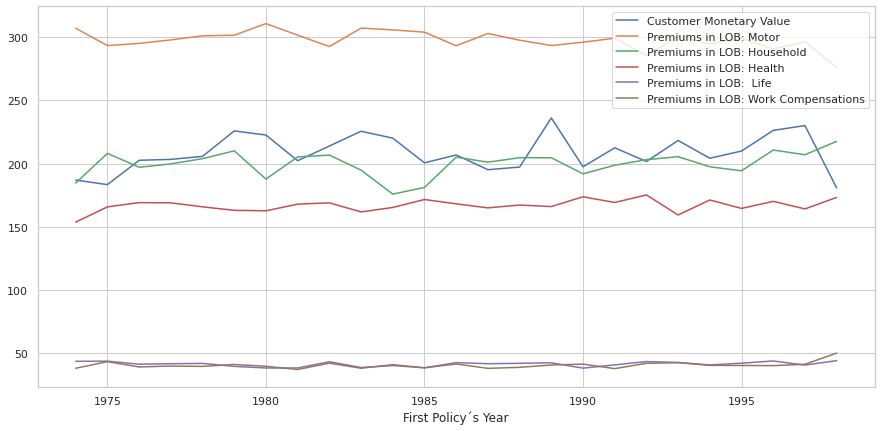

In [ ]:
df_by_year = df_byyear[["Customer Monetary Value", "Premiums in LOB: Motor",
                            "Premiums in LOB: Household", 
                            "Premiums in LOB: Health", 
                            "Premiums in LOB:  Life", 
                            "Premiums in LOB: Work Compensations"]].copy()
df_by_year.plot(figsize=(15, 7))
plt.show()

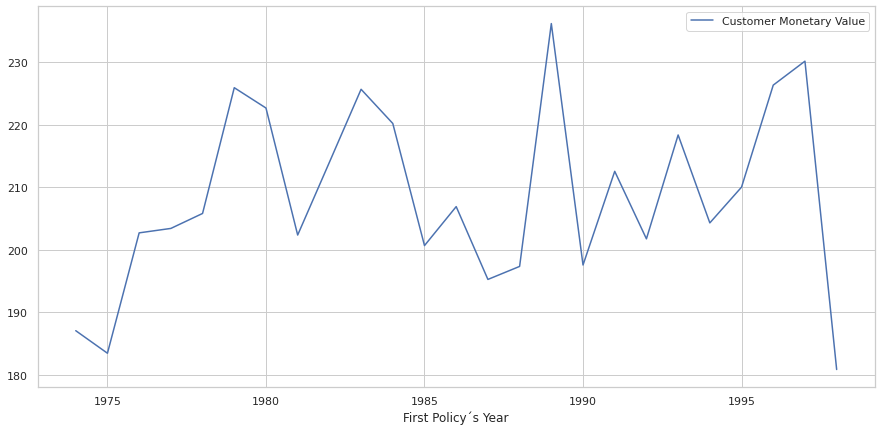

In [ ]:
df_by_year = df_byyear[["Customer Monetary Value"]].copy()
df_by_year.plot(figsize=(15, 7))
plt.show()

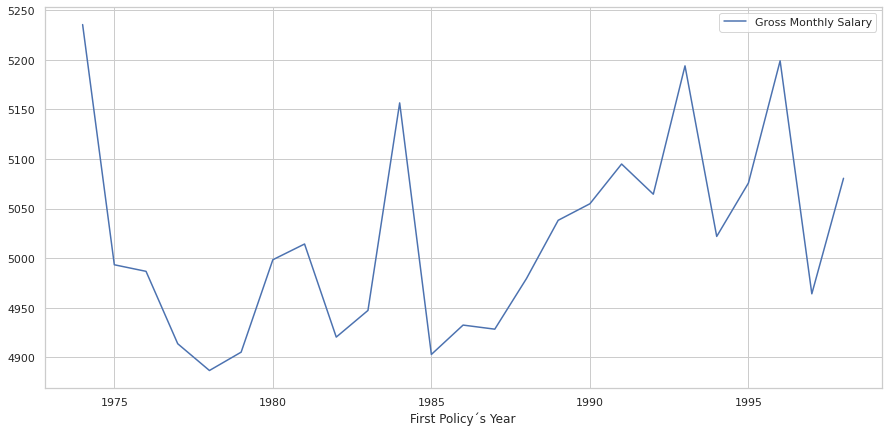

In [ ]:
df_by_year = df_byyear[["Gross Monthly Salary"]].copy()
df_by_year.plot(figsize=(15, 7))
plt.show()

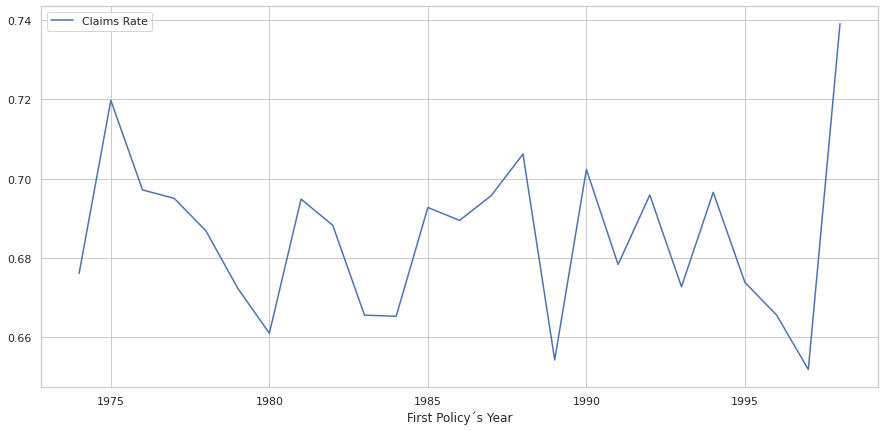

In [ ]:
df_by_year = df_byyear[["Claims Rate"]].copy()
df_by_year.plot(figsize=(15, 7))
plt.show()

# **Correlations**

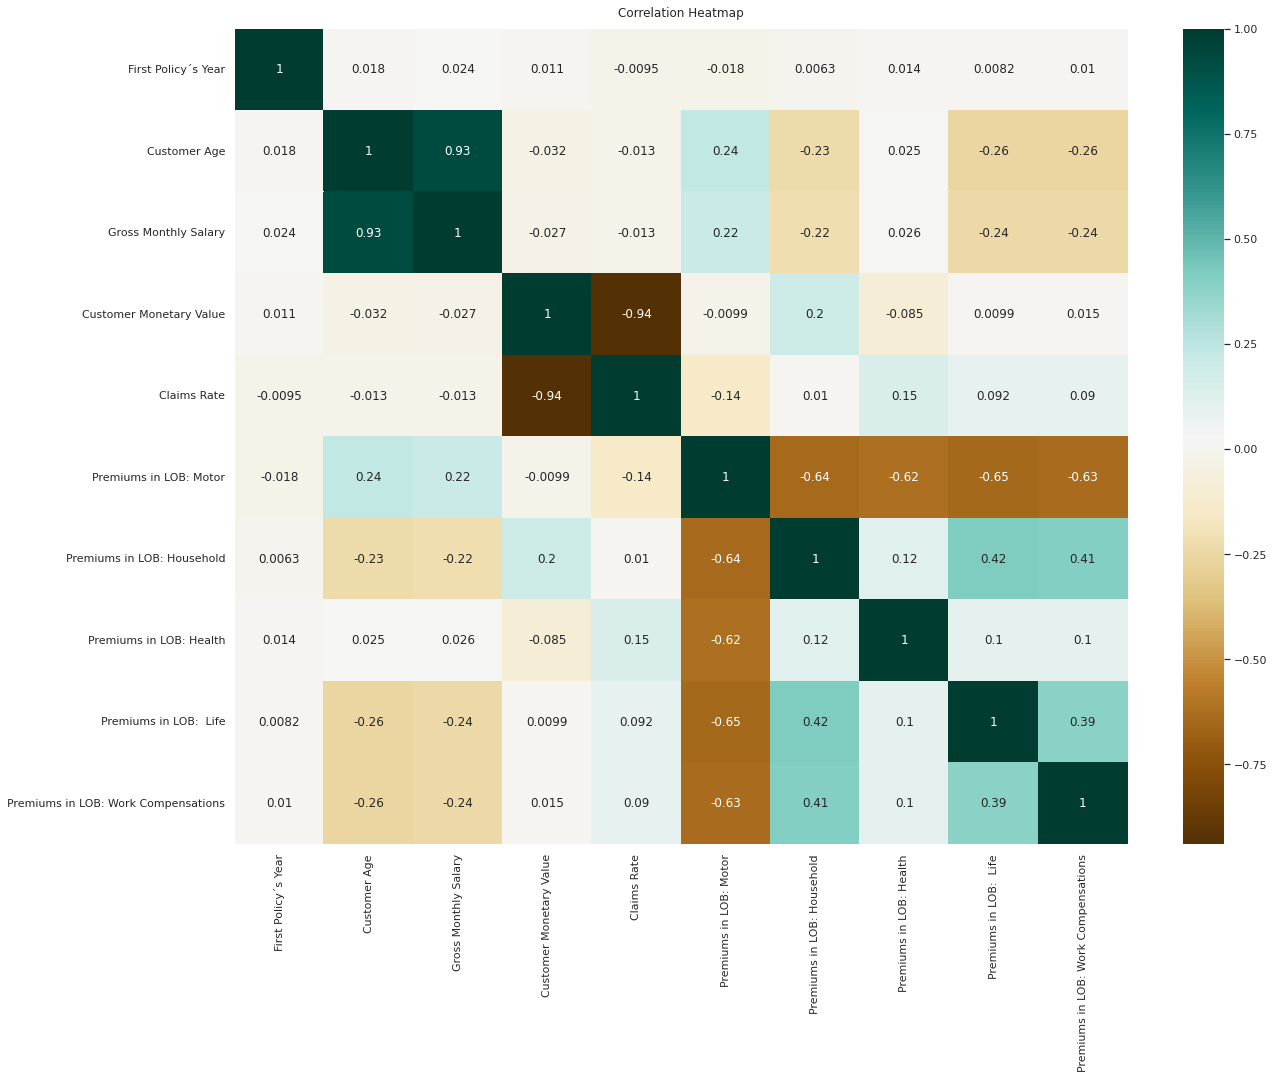

In [ ]:
fig = plt.figure(figsize = (20, 15))
heatmap = sns.heatmap(df[['First Policy´s Year', 'Customer Age', 'Gross Monthly Salary', 'Customer Monetary Value', 'Claims Rate', 
                'Premiums in LOB: Motor', 'Premiums in LOB: Household', 'Premiums in LOB: Health','Premiums in LOB:  Life', 
                'Premiums in LOB: Work Compensations']].corr(), annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);
plt.show()

In [ ]:
df_premiums = df_visual[["Premiums in LOB: Motor",
                            "Premiums in LOB: Household", 
                            "Premiums in LOB: Health", 
                            "Premiums in LOB:  Life", 
                            "Premiums in LOB: Work Compensations"]].copy()
df_premiums['Total Premiums'] = df_premiums.sum(axis=1)

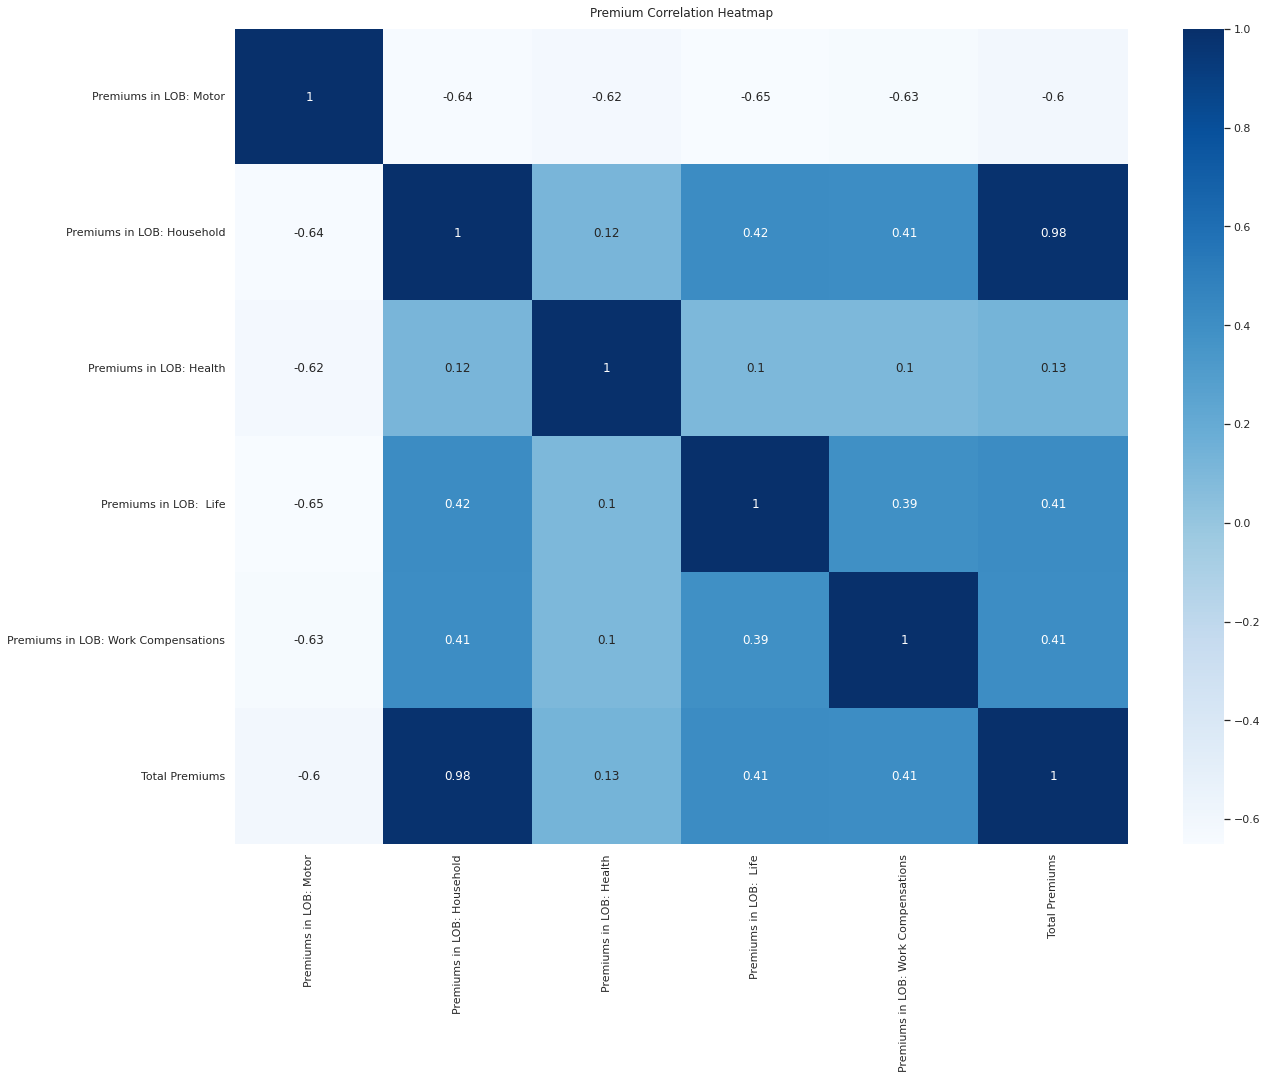

In [ ]:
fig = plt.figure(figsize = (20, 15))
heatmap = sns.heatmap(df_premiums.corr(), annot=True, cmap='Blues')
heatmap.set_title('Premium Correlation Heatmap', fontdict={'fontsize':12}, pad=12);
plt.show()

In [ ]:
pd.options.display.float_format = '$ {:,.2f}'.format
ins_sum = pd.DataFrame(df_premiums.sum(), columns=['Sum'])
ins_mean = pd.DataFrame(df_premiums.mean(), columns=['Mean'])
ins_median = pd.DataFrame(df_premiums.median(), columns=['Median'])
pd.concat([ins_sum, ins_mean, ins_median], axis=1, sort=False)

,Sum,Mean,Median
Premiums in LOB: Motor,"$ 3,004,934.57",$ 298.29,$ 300.39
Premiums in LOB: Household,"$ 2,010,770.65",$ 199.60,$ 132.25
Premiums in LOB: Health,"$ 1,684,144.26",$ 167.18,$ 162.81
Premiums in LOB: Life,"$ 415,451.72",$ 41.24,$ 24.67
Premiums in LOB: Work Compensations,"$ 405,449.86",$ 40.25,$ 25.45
Total Premiums,"$ 7,520,751.06",$ 746.55,$ 696.30
